In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import scipy.linalg
import scipy

print(np.__version__)
print(matplotlib.__version__)
print(scipy.__version__)

1.26.0
3.8.0
1.11.2


# Non-linear differential equation
$ y'' = P^2(x)y = f(x) $

$ P^2(x) > 0 $

Computational scheme:

$ \dfrac{y_1 - 2y_0 + y_{N-1}}{h^2} - P^2(0)y_0 = f(0) $

$ \dfrac{y_{n+1} - 2y_n + y_{n-1}}{h^2} - P^2(nh)y_n = f(nh) $

$ \dfrac{y_0 - 2y_{N-1} + y_{N-2}}{h^2} - P^2(1-h)y_{N-1} = f(1-h) $

$ Nh = 1, ~h = 0.005, ~P^2(x) = 10 + sin2\pi x, ~f(x) = cos2\pi x$

In [2]:
h = 0.005
N = round(1/h)

x = np.linspace(0, 1, N)

## Sweep method
Instructions from XI.7.2 Aristova II

### "Forward"

In [3]:
p = np.zeros(len(x))
q = -10 - np.sin(2*np.pi*x)
f = np.cos(2*np.pi*x)

a = 1 - 0.5*p*h
b = 2 - q*(h**2)
c = 1 + 0.5*p*h
phi = f*(h**2)

alpha = np.zeros(N)
beta = np.zeros(N)
gamma = np.zeros(N)
alpha[1] = c[0]/b[0]
beta[1] = -phi[0]/b[0]
gamma[1] = a[0]/b[0]

for k in range(1, alpha.shape[0] - 1):
    alpha[k+1] = c[k]/(b[k] - alpha[k]*a[k])
    beta[k+1] = (a[k]*beta[k] - phi[k])/(b[k] - alpha[k]/a[k])
    gamma[k+1] = a[k]*gamma[k]/(b[k] - alpha[k]*a[k])

### "Backward"

In [4]:
mu = np.zeros(N)
nu = np.zeros(N)
mu[N-1] = -c[N-1]/(a[N-1]*(alpha[N-1] + gamma[N-1]) - b[N-1])
nu[N-1] = (phi[N-1] - a[N-1]*beta[N-1])/(a[N-1]*(alpha[N-1] + gamma[N-1]) - b[N-1])

for n in reversed(range(1, alpha.shape[0])):
    mu[n-1] = alpha[n]*mu[n] + gamma[n]*mu[N-1]
    nu[n-1] = beta[n] + alpha[n]*nu[n] + gamma[n]*nu[N-1]

## Original equation solution

In [5]:
y = np.zeros(N)
y[0] = nu[0]/(1 - mu[0])
y[N-1] = mu[N-1]*y[0] + nu[N-1]

for n in reversed(range(1, alpha.shape[0])):
    y[n-1] = alpha[n]*y[n] + beta[n] + gamma[n]*y[N-1]

y = np.tile(y, 5)

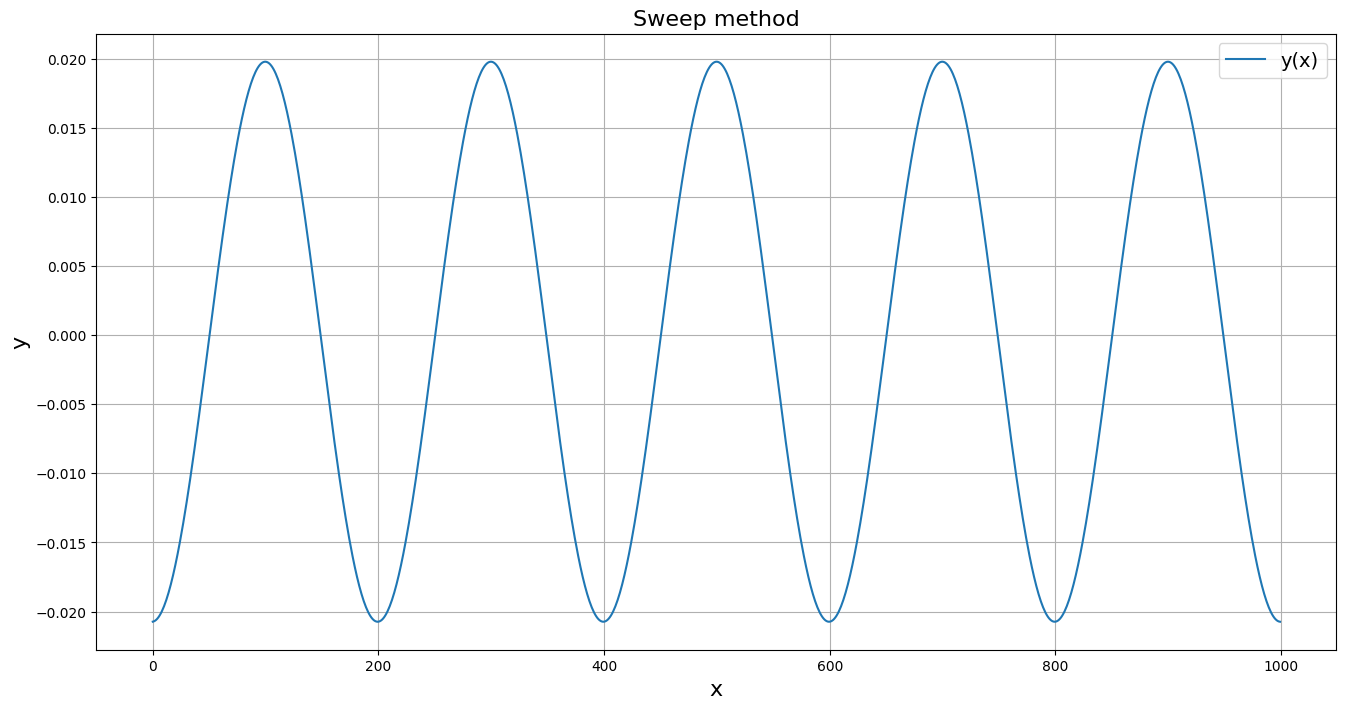

In [6]:
plt.figure(figsize=(16, 8))
plt.plot(np.linspace(0, 5*N - 1, 5*N), y, label='y(x)')

plt.title('Sweep method', fontsize=16)
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)

plt.legend(fontsize=14)
plt.grid()